# Exercise 3: Crude “hit or miss” Monte Carlo method

**Goal:** Use the "hit or miss" Monte Carlo method for calculating the volume of a sphere in different dimensions.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma

plt.rcParams['figure.figsize'] = (10, 6)

## 3.1 Area of a circle in 2D

Method:
1. Generate points uniformly in the square $[-1, 1] \times [-1, 1]$.
2. Count the fraction of points that fall inside the circle ($x^2 + y^2 < 1$).
3. The Area is $S_{box} \times \text{Fraction}$. Since the box side is 2, $S_{box} = 2 \times 2 = 4$.

### Statistical Error Estimation

To estimate the uncertainty of our Monte Carlo result, we use the Central Limit Theorem. The statistical error $\epsilon$ is given by the standard error of the mean:
$$\epsilon = \frac{\sigma}{\sqrt{N}},$$
where $\sigma$ is the standard deviation of our individual measurements.

In a "Hit or Miss" experiment, our random variable $f(x_i)$ takes only two values:
* $f(x_i) = V_{box}$ (if the point hits the target)
* $f(x_i) = 0$ (if the point misses)

This follows a Bernoulli distribution. Theoretically, the variance of such a process is:
$$\sigma^2 = V_{box}^2 \cdot p(1-p)$$
where $p$ is the probability of a hit.

In our code, we calculate $\sigma$ empirically by taking the sample standard deviation (`np.std`) of the measured values ($0$s and $V_{box}$s).

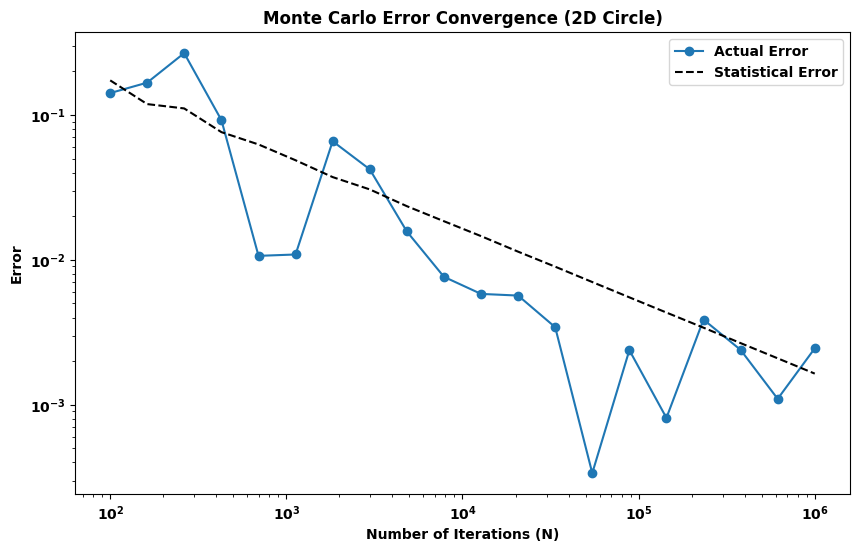

Final Estimate (N=1000000): 3.14404 (Exact: 3.14159)


In [5]:
# --- PARAMETERS ---
N_iter = np.geomspace(100, 1000000, num = 20, dtype=int) # log list of N values from 100 to 1000000
R = 1.0
S_box = 4.0 # box [-1, 1] x [-1, 1] of area 2*2 = 4

actual_errors = []
stat_errors = []

S_exact = np.pi * R**2

for N in N_iter:
    # generate N points in 2D (x, y), uniformly distributed from -1 to +1
    points = np.random.uniform(low=-1.0, high=1.0, size=(N,2)) # N rows(throws) and 2 columns (coord x and y)

    # check if points are inside the circle
    r2 = np.sum(points**2, axis=1) # axis = 1 is summing horizontally (the rows) across columns, i.e., summing x^2+y^2 for each row
    inside_mask = r2 < R**2 # true = hit, false = miss

    # calculate area
    N_inside = np.sum(inside_mask)
    prob_inside = N_inside / N
    S_estimated = S_box * prob_inside # Area = Total_Box_Area * Fraction_Inside

    # calculate errors:
    # actual error
    err_act = abs(S_estimated-S_exact)
    actual_errors.append(err_act)
    # statistical error (= uncertainty in our measurement): sigma / sqrt(N)
    samples = inside_mask.astype(float) * S_box
    sample_sigma = np.std(samples) # = sqrt(p*(1-p)) * V_box
    err_stat = sample_sigma / np.sqrt(N)
    stat_errors.append(err_stat)

# --- Plotting ---
plt.figure()
plt.loglog(N_iter, actual_errors, 'o-', label='Actual Error')
plt.loglog(N_iter, stat_errors, 'k--', label='Statistical Error')

plt.xlabel('Number of Iterations (N)')
plt.ylabel('Error')
plt.title('Monte Carlo Error Convergence (2D Circle)')
plt.legend()
plt.show()

print(f"Final Estimate (N={N_iter[-1]}): {S_estimated:.5f} (Exact: {S_exact:.5f})")

## 3.2 Volume of a Sphere in 3 Dimensions

Generalize the "Hit or Miss" method to calculate the volume of a sphere in 3D.

- We sample points uniformly inside a cube defined by $x, y, z \in [-1, 1]$.
- The side length is 2, so $V_{box} = 2^3 = 8$.
- A point is inside the sphere if $x^2 + y^2 + z^2 < R^2$.

We will estimate the volume and the statistical error using the sample standard deviation, just as we did for the 2D case.

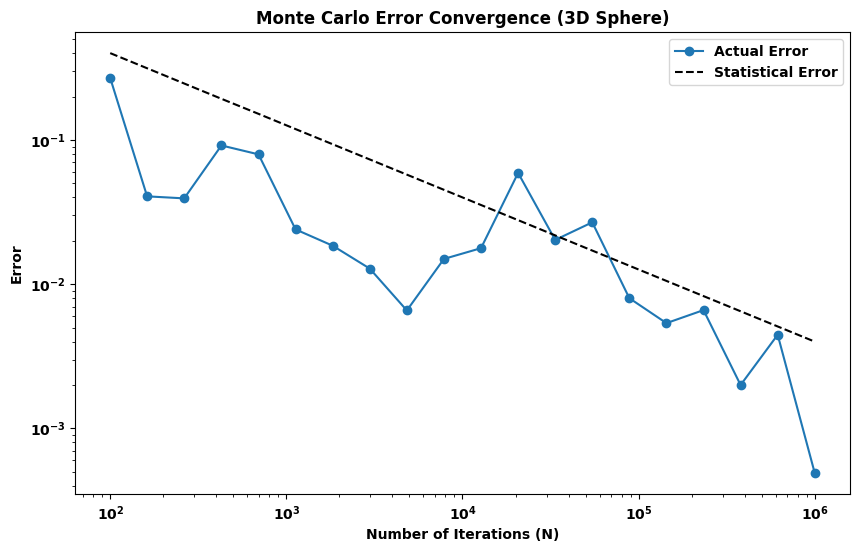

Final Estimate (N=1000000): 4.18928 (Exact: 4.18879)


In [6]:
# --- PARAMETERS ---
N_iter = np.geomspace(100, 1000000, num = 20, dtype=int) # log list of N values from 100 to 1000000
R = 1.0
S_box = 2**3 # box [-1, 1] x [-1, 1] x [-1, 1] of area 2^3 = 8

actual_errors = []
stat_errors = []

S_exact = (4/3) * np.pi * R**3

for N in N_iter:
    # generate N points in 3D (x, y, z), uniformly distributed from -1 to +1
    points = np.random.uniform(low=-1.0, high=1.0, size=(N,3)) # N rows(throws) and 3 columns (coords x, y and z)

    # check if points are inside the circle
    r2 = np.sum(points**2, axis=1) # summing x^2+y^2+z^2 for each row
    inside_mask = r2 < R**2 # true = hit, false = miss

    # calculate area
    N_inside = np.sum(inside_mask)
    prob_inside = N_inside / N
    S_estimated = S_box * prob_inside # Area = Total_Box_Area * Fraction_Inside

    # calculate errors:
    # actual error
    err_act = abs(S_estimated-S_exact)
    actual_errors.append(err_act)
    # statistical error (= uncertainty in our measurement): sigma / sqrt(N)
    samples = inside_mask.astype(float) * S_box
    sample_sigma = np.std(samples) # = sqrt(p*(1-p)) * V_box
    err_stat = sample_sigma / np.sqrt(N)
    stat_errors.append(err_stat)

# --- Plotting ---
plt.figure()
plt.loglog(N_iter, actual_errors, 'o-', label='Actual Error')
plt.loglog(N_iter, stat_errors, 'k--', label='Statistical Error')

plt.xlabel('Number of Iterations (N)')
plt.ylabel('Error')
plt.title('Monte Carlo Error Convergence (3D Sphere)')
plt.legend()
plt.show()

print(f"Final Estimate (N={N_iter[-1]}): {S_estimated:.5f} (Exact: {S_exact:.5f})")


## 3.3 Volume of a Sphere in D Dimensions

Let us now see how the "Crude" Monte Carlo method performs as dimensionality $D$ increases.

**Generalization:**
- Box Volume: $V_{box} = 2^D$
- Condition: $\sum_{i=1}^{D} x_i^2 < R^2$
- Exact Volume: $V_D = \frac{\pi^{D/2}}{\Gamma(D/2 + 1)} R^D$

**The Curse of Dimensionality:**

As $D$ increases, the volume of the hypercube ($2^D$) grows exponentially, while the volume of the inscribed sphere grows much slower (and eventually shrinks). Therefore, the probability of a random point "hitting" the sphere becomes vanishingly small. 

We will identify the dimension where this method breaks down (i.e., when we get 0 hits).

In [12]:
def MC_sphere_D(D, N_iter):
    """
    Crude Monte Carlo method to estimate the volume of a sphere of unit radius in D dimentions
    Returns: Estimated volume, Exact volume, Relative and Statistical Errors, Number of hits
    """
    R = 1.0
    V_box = 2.0**D

    # 1. Generate random points in the box
    points = np.random.uniform(-1, 1, size=(N_iter, D))

    # 2. Check hits
    r2 = np.sum(points**2, axis = 1)
    inside_mask = r2 < R**2

    # 3. Estimate volume
    hits = np.sum(inside_mask)
    fraction_inside = hits / N_iter
    V_est = V_box * fraction_inside

    # 4. Exact volume
    V_exact = (np.pi**(D/2) * R**D) / gamma(D/2+1)

    # 5. Errors
    # Statistical error: sigma / sqrt(N)
    samples = inside_mask.astype(float) * V_box
    sample_sigma = np.std(samples)
    stat_error = sample_sigma / np.sqrt(N_iter)

    # Relative error
    if V_exact > 0:
        rel_error = abs(V_est - V_exact) / V_exact
    else:
        rel_error = 0.0

    return V_est, V_exact, rel_error, stat_error, hits

Dim  | Est. Volume  | Exact Volume | Rel. Err.    | Stat. Err.   | Hits        
2    | 3.144108     | 3.141593     | 0.080066    % | 0.001640     | 786027.000000
3    | 4.188584     | 4.188790     | 0.004923    % | 0.003996     | 523573.000000
4    | 4.934112     | 4.934802     | 0.013986    % | 0.007389     | 308382.000000
5    | 5.254720     | 5.263789     | 0.172291    % | 0.011855     | 164210.000000
6    | 5.179712     | 5.167713     | 0.232196    % | 0.017455     | 80933.000000
7    | 4.752512     | 4.724766     | 0.587247    % | 0.024202     | 37129.000000
8    | 4.142336     | 4.058712     | 2.060355    % | 0.032300     | 16181.000000
9    | 3.379200     | 3.298509     | 2.446290    % | 0.041458     | 6600.000000 
10   | 2.507776     | 2.550164     | 1.662169    % | 0.050613     | 2449.000000 
11   | 1.890304     | 1.884104     | 0.329075    % | 0.062191     | 923.000000  
12   | 1.380352     | 1.335263     | 3.376806    % | 0.075180     | 337.000000  
13   | 0.925696     | 0.9

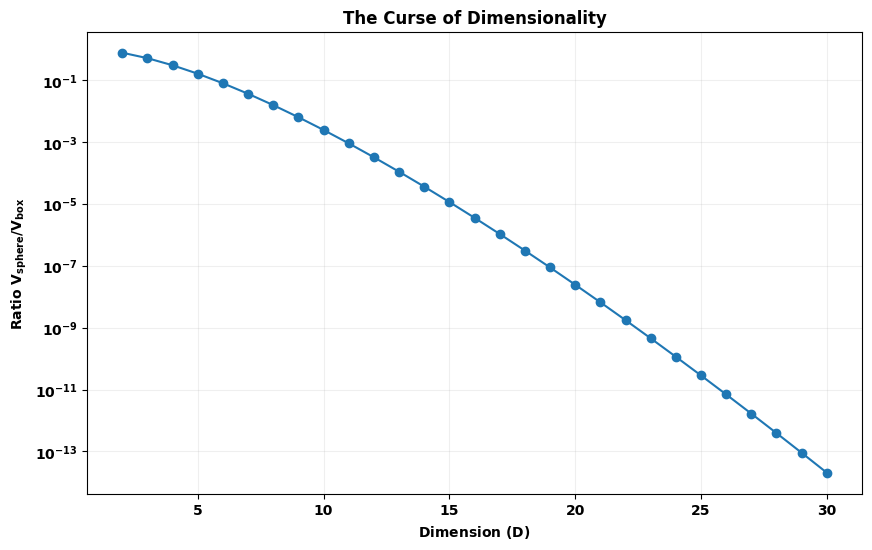

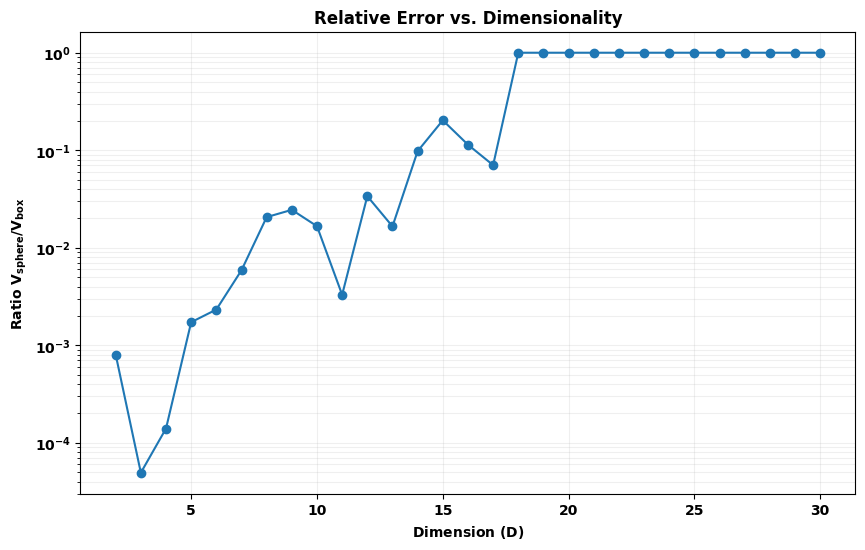

In [35]:
# --- Simulation for dimensions 2 to 30 ---
dims = range(2, 31)
N_sim = 1000000

# Calculate the ratio of Sphere Volume to Box Volume = probability of a hit
ratio_history = []
rel_error_history = []

print(f"{'Dim':<4} | {'Est. Volume':<12} | {'Exact Volume':<12} | {'Rel. Err.':<12} | {'Stat. Err.':<12} | {'Hits':<12}")

for D in dims:
    V_est, V_exact, rel_error, stat_error, hits = MC_sphere_D(D, N_iter=N_sim)
    
    ratio = V_exact / (2.0**D)
    ratio_history.append(ratio)

    rel_error_history.append(rel_error)

    print(f"{D:<4} | {V_est:<12f} | {V_exact:<12f} | {rel_error*100:<12f}% | {stat_error:<12f} | {hits:<12f}")


# --- Plotting ---
plt.figure()
plt.semilogy(dims, ratio_history, 'o-')
plt.xlabel('Dimension ($D$)')
plt.ylabel('Ratio $V_{sphere} / V_{box}$')
plt.title('The Curse of Dimensionality')
plt.grid(True, which="both", ls="-", alpha=0.2)
plt.show()

plt.figure()
plt.semilogy(dims, rel_error_history, 'o-')
plt.xlabel('Dimension ($D$)')
plt.ylabel('Ratio $V_{sphere} / V_{box}$')
plt.title('Relative Error vs. Dimensionality')
plt.grid(True, which="both", ls="-", alpha=0.2)
plt.show()

As we can observe, the method  works realtively well for low dimensions but fails as the dimension D increases: the target becomes smaller and smaller, becoming essentially impossible to hit for D larger than 10.

This could be seen also in the expression for the ratio between the volume of the sphere of diameter 2R and a cube with side 2R in D dimensions (which represents the probability of a random point falling inside the sphere):
* Sphere Volume: $V_{sphere} = \frac{\pi^{D/2}}{\Gamma(D/2 + 1)} R^D$
* Cube Volume: $V_{cube} = (2R)^D = 2^D R^D$

The ratio is:
$$\frac{V_{sphere}}{V_{cube}} = \frac{\pi^{D/2}}{2^D \Gamma(D/2 + 1)}$$

As $D$ increases, the $\Gamma$ function (factorial for non-integers) in the denominator grows much faster than the power terms in the numerator. This causes the ratio to decay to zero very rapidly (the so-called "Curse of Dimensionality").

## 3.4 Volume of a sphere in D=100 dimensions using Importance Sampling

We now want to estimate the volume of a sphere in $D=100$ dimensions.

The problem, as we saw in the last section, is that in $D=100$, the ratio $\frac{V_{sphere}}{V_{box}}$ becomes really small (essentially zero), so a crude Monte Carlo simulation would require a non-sense amount of samples to get a single hit.

However, the solution to this problem can be found using **Importance Sampling**: instead of sampling uniformly, we sample points $\{x_i\}$ from a Normal Distribution $p(x)$ centered at the origin. This concentrates our "darts" in the region where the sphere actually exists.

We use the formula given in the lectures [Eq. 2.4]:
$$V \approx \left\langle (2\pi)^{D/2} \sigma^D e^{\frac{\sum x_i^2}{2\sigma^2}} \cdot \theta(R^2 - \sum x_i^2) \right\rangle_{normal}$$

**Implementation Note:** To efficiently sample the unit sphere ($R=1$) in $D$ dimensions, we must match the width of our Gaussian distribution to the size of the sphere.

For a Gaussian with width $\sigma$, the expected squared distance from the origin is the sum of the variances of all $D$ dimensions:
$$E[r^2] = D \cdot \sigma^2$$

To ensure the points land near the sphere's surface ($r^2 \approx 1$), we set:
$$D \cdot \sigma^2 = 1 \quad \Rightarrow \quad \sigma = \frac{1}{\sqrt{D}}$$

In [38]:
def MC_sphere_IS(D, N_iter):
    """
    Importance Sampling Monte Carlo to estimate the volume of a sphere in D dimensions.
    Returns: Estimated Volume, Exact Volume, Relative Error
    """
    R = 1.0

    # 1. Choose sigma for Importance Sampling (I.S.)
    sigma = 1 / np.sqrt(D)

    # 2. Generate points using I.S.
    points = np.random.normal(loc=0, scale=sigma, size=(N_iter, D)) # loc is the mean of the gaussian

    # 3. Filter points that hit inside the sphere
    r2 = np.sum(points**2, axis=1)
    mask_inside = r2 < R**2
    valid_r2 = r2[mask_inside]

    # 4. Compute estimated volume
    const_term = (2*np.pi)**(D/2) * sigma**D * np.exp(valid_r2/(2*sigma**2))
    V_est = np.sum(const_term) / N_iter # note points outside the sphere contribute 0, while does inside contribute const_term!

    # 5. Exact volume
    V_exact = (np.pi**(D/2) * (R**D)) / gamma(D/2 + 1)

    # 6. Relative error
    if V_exact > 0:
        rel_error = abs(V_est - V_exact) / V_exact
    else:
        rel_error = 0
    
    return V_est, V_exact, rel_error

Dim  | Est. Volume  | Exact Volume | Rel. Err.   
1    | 2.002027     | 2.000000     | 0.101352    %
6    | 5.157800     | 5.167713     | 0.191822    %
11   | 1.881755     | 1.884104     | 0.124685    %
16   | 0.234947     | 0.235331     | 0.162835    %
21   | 0.013978     | 0.013949     | 0.206174    %
26   | 0.000467     | 0.000466     | 0.231785    %
31   | 0.000010     | 0.000010     | 0.010604    %
36   | 0.000000     | 0.000000     | 0.107350    %
41   | 0.000000     | 0.000000     | 0.074516    %
46   | 0.000000     | 0.000000     | 0.226653    %
51   | 0.000000     | 0.000000     | 0.077919    %
56   | 0.000000     | 0.000000     | 0.312669    %
61   | 0.000000     | 0.000000     | 0.006363    %
66   | 0.000000     | 0.000000     | 0.308766    %
71   | 0.000000     | 0.000000     | 0.321234    %
76   | 0.000000     | 0.000000     | 0.393937    %
81   | 0.000000     | 0.000000     | 0.374007    %
86   | 0.000000     | 0.000000     | 0.614673    %
91   | 0.000000     | 0.000000  

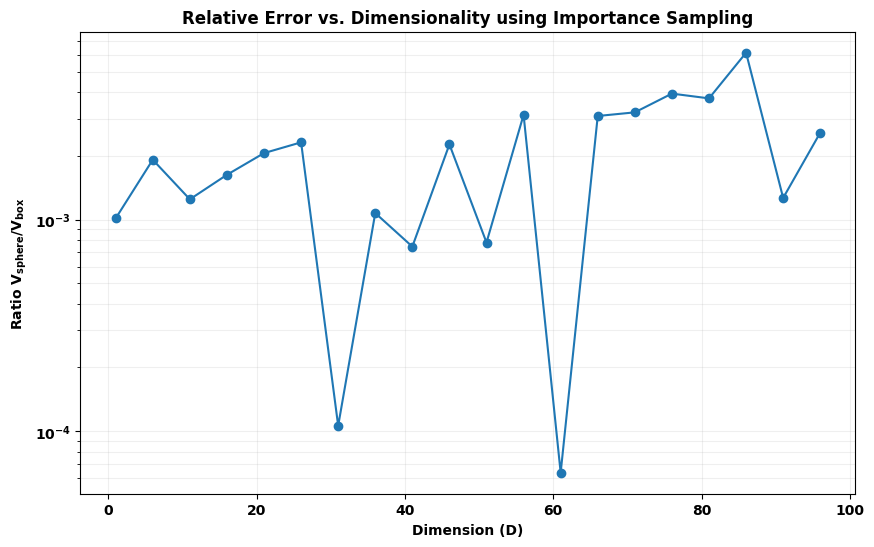

In [40]:
# --- Parameters ---
dims = range(1, 101, 5)
N_sim = 1000000

rel_error_history = []

print(f"{'Dim':<4} | {'Est. Volume':<12} | {'Exact Volume':<12} | {'Rel. Err.':<12}")

for D in dims:
    V_est, V_exact, rel_error = MC_sphere_IS(D, N_sim)

    rel_error_history.append(rel_error)

    print(f"{D:<4} | {V_est:<12f} | {V_exact:<12f} | {rel_error*100:<12f}%")

# --- Plotting ---
plt.figure()
plt.semilogy(dims, rel_error_history, 'o-')
plt.xlabel('Dimension (D)')
plt.ylabel('Ratio $V_{sphere} / V_{box}$')
plt.title('Relative Error vs. Dimensionality using Importance Sampling')
plt.grid(True, which="both", ls="-", alpha=0.2)
plt.show()


Unlike the Crude method, where the error jumped to 100% at D = 12, here the error stays very low all the way to D = 100, proving that Importance Sampling sucessfully defeats the curse of dimensionality for this specific problem at least.